# Data anlysis of CalcioTrend
* We are going to analyze the data of CalcioTrend

Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [2]:
app = pd.read_csv("Assignment_Data/appearances.csv")
club_games = pd.read_csv("Assignment_Data/club_games.csv")
clubs = pd.read_csv("Assignment_Data/clubs.csv")
competitions = pd.read_csv("Assignment_Data/competitions.csv")
game_events = pd.read_csv("Assignment_Data/game_events.csv")
game_lineaps = pd.read_csv("Assignment_Data/game_lineups.csv")
games = pd.read_csv("Assignment_Data/games.csv")
player_valutations = pd.read_csv("Assignment_Data/player_valuations.csv")
players = pd.read_csv("Assignment_Data/players.csv")

## Data understanding

In [8]:
app.shape #Numero righe/colonne del dataset
app.head() #Primi 5 elementi del dataset
app.columns #Nome delle colonne
app.describe() #Descrizione del dataset

NameError: name 'app' is not defined

## Data preparation

In [103]:
print(app.isna().sum()) #Controlla se ci sono valori nulli
print(club_games.isna().sum())

appearance_id               0
game_id                     0
player_id                   0
player_club_id              0
player_current_club_id      0
date                        0
player_name               324
competition_id              0
yellow_cards                0
red_cards                   0
goals                       0
assists                     0
minutes_played              0
dtype: int64
game_id                      0
club_id                      0
own_goals                    0
own_position             38908
own_manager_name          1484
opponent_id                  0
opponent_goals               0
opponent_position        38908
opponent_manager_name     1484
hosting                      0
is_win                       0
dtype: int64


In [104]:
app.dropna(inplace=True) #Rimuove i valori nulli
club_games.dropna(inplace=True)

In [105]:
print(app.isna().sum()) #Controlla se ci sono valori nulli
print(club_games.isna().sum())

appearance_id             0
game_id                   0
player_id                 0
player_club_id            0
player_current_club_id    0
date                      0
player_name               0
competition_id            0
yellow_cards              0
red_cards                 0
goals                     0
assists                   0
minutes_played            0
dtype: int64
game_id                  0
club_id                  0
own_goals                0
own_position             0
own_manager_name         0
opponent_id              0
opponent_goals           0
opponent_position        0
opponent_manager_name    0
hosting                  0
is_win                   0
dtype: int64


In [51]:
app.loc[app.duplicated()] #Controlla se ci sono valori duplicati

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played


### cleaning for geopandas

## Data analysis (camb nome)
Let's analyze the players who have spent the most time on the soccer field

<Figure size 1000x600 with 0 Axes>

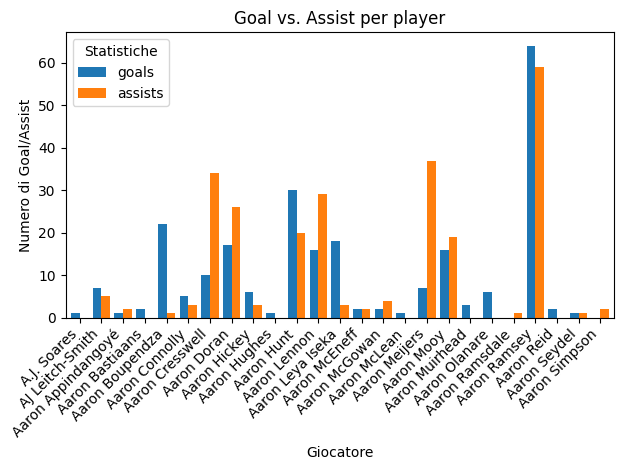

In [106]:
grouped_app = app.groupby('player_name')[['goals', 'assists']].sum()
grouped_app = grouped_app [(grouped_app['goals'] > 0) | (grouped_app['assists'] > 0)]
grouped_app = grouped_app.head(25)

# Grafico a barre (Rappresenta dati disctreti ogni barra rappresenta un giocatore
plt.figure(figsize=(10, 6))
grouped_app.plot(kind='bar', width=0.8)
plt.title('Goal vs. Assist per player')
plt.xlabel('Giocatore')
plt.ylabel('Numero di Goal/Assist')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Statistiche')
plt.tight_layout()
plt.show()

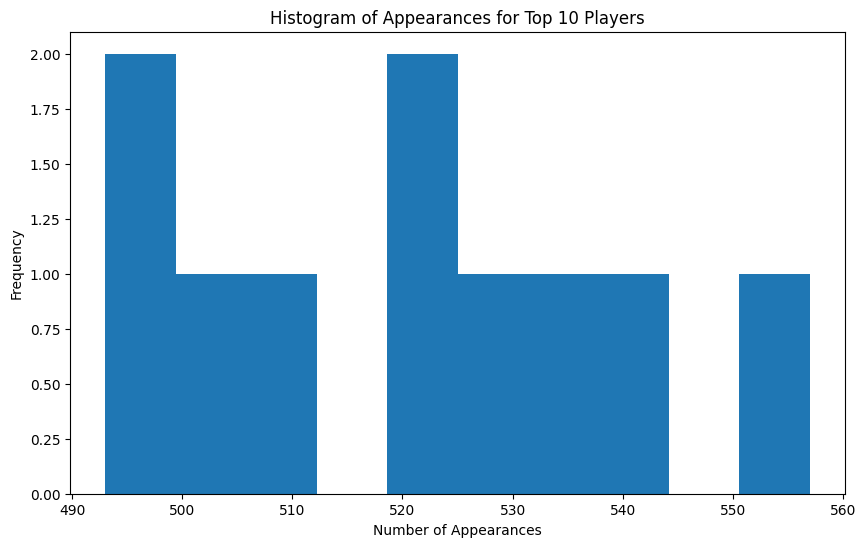

In [107]:
#Istogramma dei 10 giocatori con più apparizioni (controllare frequenza tra 0 e 2)
# Calcola il numero di apparizioni per giocatore
appearances_per_player = app.groupby('player_id')['appearance_id'].count()

# Ordina i giocatori per numero di apparizioni in ordine decrescente
top_players = appearances_per_player.sort_values(ascending=False)

# Seleziona i primi 10 giocatori
top_10_players = top_players.head(10)

# Crea l'istogramma utilizzando plot(kind='hist')
plt.figure(figsize=(10, 6))
top_10_players.plot(kind='hist', bins=10)
plt.xlabel('Number of Appearances')
plt.ylabel('Frequency')
plt.title('Histogram of Appearances for Top 10 Players')
plt.show()


<Figure size 1000x600 with 0 Axes>

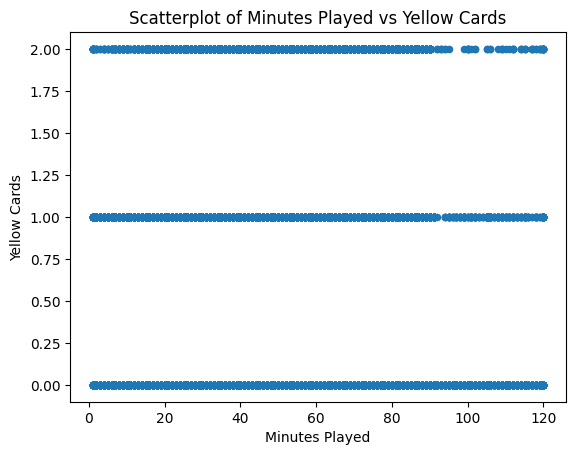

In [108]:
#Scatterplot tra minuti giocati e cartellini gialli
# Seleziona solo le colonne di interesse
subset_data = app[['minutes_played', 'yellow_cards']]

# Rimuovi le righe con valori nulli
subset_data = subset_data.dropna()

# Crea il grafico scatterplot utilizzando plot(kind='scatter')
plt.figure(figsize=(10, 6))
subset_data.plot(x='minutes_played', y='yellow_cards', kind='scatter')
plt.xlabel('Minutes Played')
plt.ylabel('Yellow Cards')
plt.title('Scatterplot of Minutes Played vs Yellow Cards')
plt.show()


### Top scorers Analysis

In [109]:
goals_events =game_events[game_events['type'] == 'Goals']
players_goals = goals_events.groupby('player_id').size().reset_index(name='total_goals')
top_scorers = players_goals.merge(players, on='player_id')
top_scorers = top_scorers.sort_values(by='total_goals', ascending=False).head(10)

top_scorers.head(10)

,player_id,total_goals,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
2229,38253,449,Robert,Lewandowski,Robert Lewandowski,2023,131,robert-lewandowski,Poland,Warszawa,...,right,185.0,30000000.0,90000000.0,2026-06-30 00:00:00,Gol International,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/robert-lewando...,ES1,FC Barcelona
1583,28003,443,Lionel,Messi,Lionel Messi,2022,583,lionel-messi,Argentina,Rosario,...,left,170.0,35000000.0,180000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lionel-messi/p...,FR1,Paris Saint-Germain
502,8198,433,NaN,Cristiano Ronaldo,Cristiano Ronaldo,2022,985,cristiano-ronaldo,Portugal,Funchal,...,right,187.0,15000000.0,120000000.0,2025-06-30 00:00:00,Gestifute,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/cristiano-rona...,GB1,Manchester United
6547,132098,294,Harry,Kane,Harry Kane,2023,27,harry-kane,England,London,...,right,188.0,90000000.0,150000000.0,2027-06-30 00:00:00,CK66,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/harry-kane/pro...,L1,Bayern Munich
2595,44352,283,Luis,Suárez,Luis Suárez,2021,13,luis-suarez,Uruguay,Salto,...,right,182.0,4000000.0,90000000.0,2024-12-31 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/luis-suarez/pr...,ES1,Atlético de Madrid
1071,18922,279,Karim,Benzema,Karim Benzema,2022,418,karim-benzema,France,Lyon,...,right,185.0,25000000.0,60000000.0,2026-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/karim-benzema/...,ES1,Real Madrid
3613,58864,274,Pierre-Emerick,Aubameyang,Pierre-Emerick Aubameyang,2023,244,pierre-emerick-aubameyang,France,Laval,...,right,187.0,4000000.0,75000000.0,2026-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/pierre-emerick...,FR1,Olympique Marseille
6957,148455,251,NaN,Mohamed Salah,Mohamed Salah,2023,31,mohamed-salah,Egypt,"Nagrig, Basyoun",...,left,175.0,65000000.0,150000000.0,2025-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/mohamed-salah/...,GB1,Liverpool FC
5659,105521,249,Ciro,Immobile,Ciro Immobile,2023,398,ciro-immobile,Italy,Torre Annunziata,...,right,185.0,15000000.0,50000000.0,2026-06-30 00:00:00,Gea World,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ciro-immobile/...,IT1,SS Lazio
5369,96341,247,Romelu,Lukaku,Romelu Lukaku,2023,12,romelu-lukaku,Belgium,Antwerpen,...,left,191.0,40000000.0,100000000.0,2024-06-30 00:00:00,TEAM LUKAKU,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/romelu-lukaku/...,IT1,AS Roma


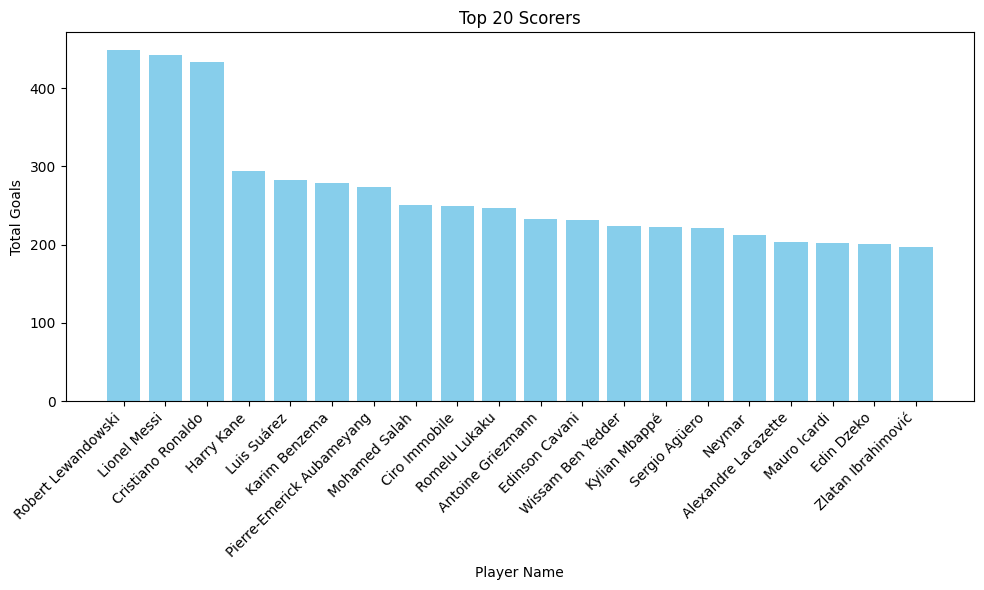

In [7]:
#filter to get only the goals events
goals_events =game_events[game_events['type'] == 'Goals']
#group by player_id and count the number of goals
players_goals = goals_events.groupby('player_id').size().reset_index(name='total_goals')
top_scorers = players_goals.merge(players, on='player_id')
top_scorers = top_scorers.sort_values(by='total_goals', ascending=False).head(20)

#bar chart 
plt.figure(figsize=(10, 6))
plt.bar(top_scorers['name'], top_scorers['total_goals'], color='skyblue')
plt.xlabel('Player Name')
plt.ylabel('Total Goals')
plt.title('Top 20 Scorers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Competitions Analysis

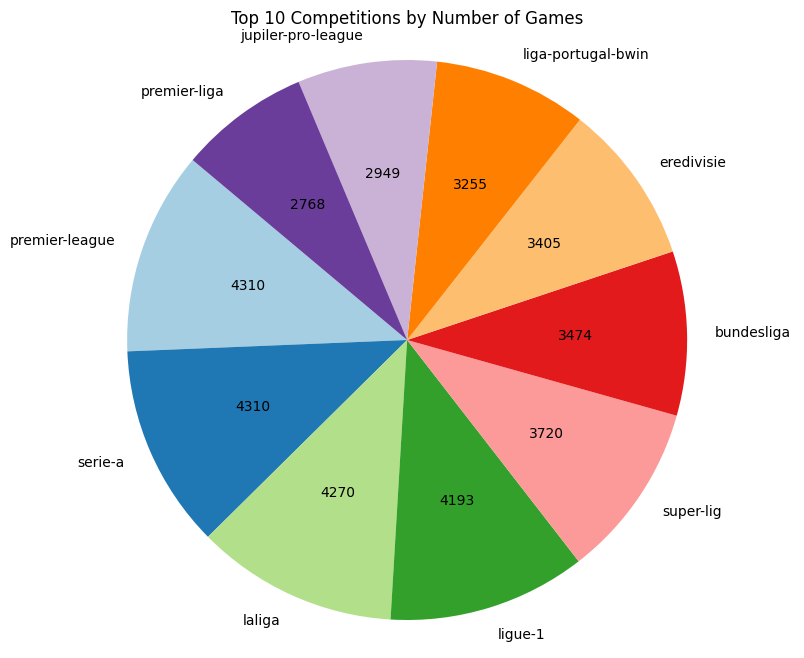

In [8]:
competitions_games = games.groupby('competition_id').size().reset_index(name='total_games')
competition_performance = competitions_games.merge(competitions, on='competition_id')
# Sort competitions by the number of games
top_competitions = competition_performance.sort_values(by='total_games', ascending=False).head(10)
def all_games(val): a = np.round(val/100.*top_competitions['total_games'].sum(), 0); return int(a)

#pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_competitions['total_games'], labels=top_competitions['name'], autopct=all_games, startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Competitions by Number of Games')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Club performance Analysis

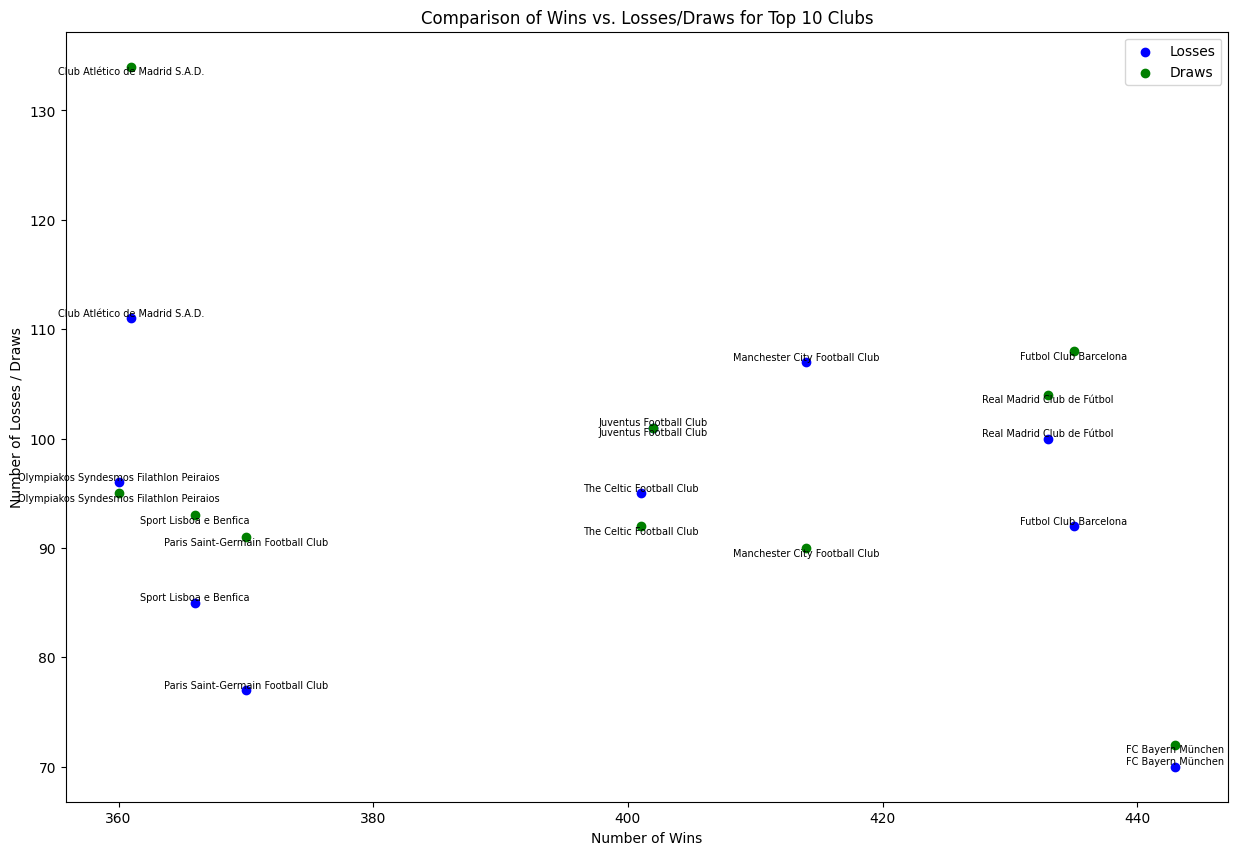

In [9]:
games['home_win'] = games['home_club_goals'] > games['away_club_goals']
games['away_win'] = games['home_club_goals'] < games['away_club_goals']
games['draw'] = games['home_club_goals'] == games['away_club_goals']

home_performance = games.groupby('home_club_id').agg(
    total_games=('game_id', 'count'),
    wins=('home_win', 'sum'),
    losses=('away_win', 'sum'),
    draws=('draw', 'sum')
).reset_index()

away_performance = games.groupby('away_club_id').agg(
    total_games=('game_id', 'count'),
    wins=('away_win', 'sum'),
    losses=('home_win', 'sum'),
    draws=('draw', 'sum')
).reset_index()

home_performance.rename(columns={'home_club_id': 'club_id'}, inplace=True)
away_performance.rename(columns={'away_club_id': 'club_id'}, inplace=True)
club_performance = pd.concat([home_performance, away_performance])
club_performance = club_performance.groupby('club_id').sum().reset_index()
# Merge with clubs dataset
club_performance = club_performance.merge(clubs, on='club_id')
# Sort clubs by the number of wins
top_clubs = club_performance.sort_values(by='wins', ascending=False).head(10)

# Example: Create dummy data for visualization purposes
# Generate random data for illustration
np.random.seed(42)
dates = pd.date_range('2021-01-01', periods=12, freq='ME')
top_club_ids = top_clubs['club_id']

# Create a dummy DataFrame to simulate performance over time
performance_over_time = pd.DataFrame({
    'date': np.tile(dates, len(top_club_ids)),
    'club_id': np.repeat(top_club_ids, len(dates)),
    'wins': np.random.randint(0, 5, size=len(top_club_ids) * len(dates)),
    'losses': np.random.randint(0, 5, size=len(top_club_ids) * len(dates)),
    'draws': np.random.randint(0, 5, size=len(top_club_ids) * len(dates))
})

# Merge with club names
performance_over_time = performance_over_time.merge(clubs[['club_id', 'name']], on='club_id')

# Plot line chart for each club
# Scatter plot for club performance comparison
plt.figure(figsize=(15, 10))
plt.scatter(top_clubs['wins'], top_clubs['losses'], c='blue', label='Losses')
plt.scatter(top_clubs['wins'], top_clubs['draws'], c='green', label='Draws')
for i, club in top_clubs.iterrows():
    plt.text(club['wins'], club['losses'], club['name'], fontsize=7, ha='center', va='bottom', color='black', rotation=0)
    plt.text(club['wins'], club['draws'], club['name'], fontsize=7, ha='center', va='top', color='black', rotation=0)
plt.xlabel('Number of Wins')
plt.ylabel('Number of Losses / Draws')
plt.title('Comparison of Wins vs. Losses/Draws for Top 10 Clubs')
plt.legend()
plt.show()



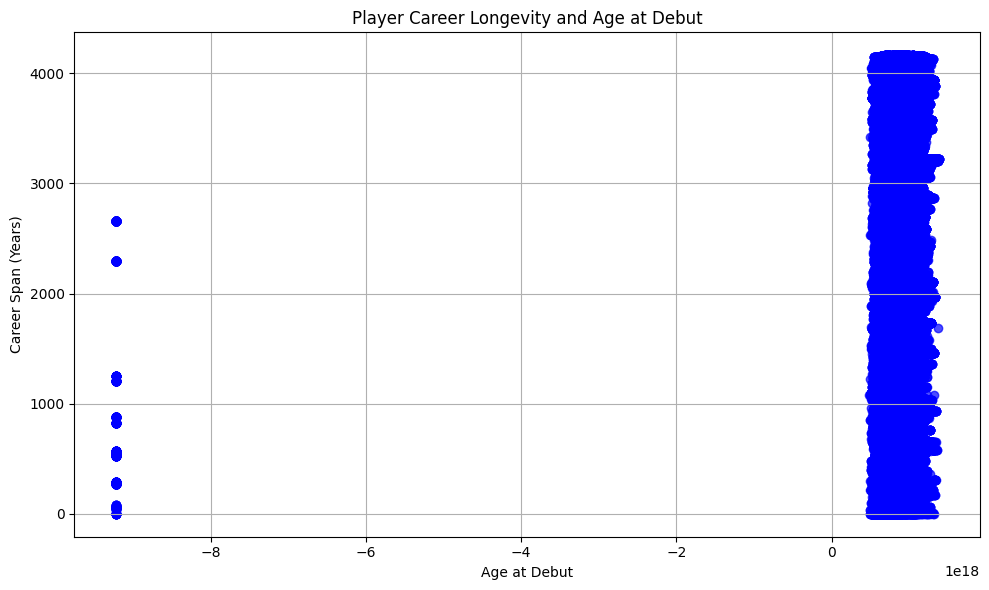

In [129]:
# Merge appearances and players data on player_id
player_career = pd.merge(app, players, on='player_id', how='left')
player_career['date'] = pd.to_datetime(player_career['date'])
player_career['career_span'] = player_career.groupby('player_id')['date'].transform(lambda x: (x.max() - x.min()).days)

# Calculate age at debut
player_career['date_of_birth'] = pd.to_datetime(player_career['date_of_birth'])
player_career['age_at_debut'] = (player_career['date'] - player_career['date_of_birth']).astype(int)

# Example: Average number of appearances per season
player_career['season'] = player_career['date'].dt.year
avg_appearances_per_season = player_career.groupby(['player_id', 'season']).size().groupby('player_id').mean()


# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(player_career['age_at_debut'], player_career['career_span'], color='blue', alpha=0.7)

plt.xlabel('Age at Debut')
plt.ylabel('Career Span (Years)')
plt.title('Player Career Longevity and Age at Debut')
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
def load_data():
    # Merge dataframes
    merged_data = app.merge(club_games, on='game_id') \
                     .merge(clubs, left_on='player_club_id', right_on='club_id') \
                     .merge(competitions, on='competition_id') \
                     .merge(game_events, on='game_id') \
                     .merge(game_lineaps, on='game_id') \
                     .merge(games, on='game_id') \
                     .merge(player_valuations, on='player_id') \
                     .merge(players, on='player_id')
    return merged_data

def calculate_player_impact(data):
    player_stats = data.groupby('player_id').agg({
        'goals': 'sum',
        'assists': 'sum',
        'minutes_played': 'sum',
        'yellow_cards': 'sum',
        'red_cards': 'sum',
        'is_win': 'sum'
    }).reset_index()
    
    player_stats['total_contributions'] = player_stats['goals'] + player_stats['assists']
    player_stats['disciplinary_actions'] = player_stats['yellow_cards'] + player_stats['red_cards']
    player_stats['win_rate'] = player_stats['is_win'] / data['game_id'].nunique()

    return player_stats

def evaluate_player_impact(player_stats, player_id):
    player_data = player_stats[player_stats['player_id'] == player_id]
    if player_data.empty:
        return f"No data available for player ID {player_id}"
    
    impact_score = (
        player_data['total_contributions'].values[0] * 0.4 +
        player_data['minutes_played'].values[0] * 0.3 +
        player_data['win_rate'].values[0] * 0.2 -
        player_data['disciplinary_actions'].values[0] * 0.1
    )
    
    return impact_score

def plot_player_impact(player_stats):
    plt.figure(figsize=(10, 6))
    plt.scatter(player_stats['player_id'], player_stats['total_contributions'], c='blue', label='Total Contributions')
    plt.scatter(player_stats['player_id'], player_stats['minutes_played'], c='green', label='Minutes Played')
    plt.scatter(player_stats['player_id'], player_stats['win_rate'], c='red', label='Win Rate')
    plt.scatter(player_stats['player_id'], player_stats['disciplinary_actions'], c='orange', label='Disciplinary Actions')
    plt.xlabel('Player ID')
    plt.ylabel('Metrics')
    plt.title('Player Impact Metrics')
    plt.legend()
    plt.show()

# Load the merged data
data = load_data()
# Calculate player impact metrics
player_impact = calculate_player_impact(data)
# Evaluate impact for a specific player
player_id = 1
impact_score = evaluate_player_impact(player_impact, player_id)
print(f"Impact score for player ID {player_id}: {impact_score}")
# Plot player impact
plot_player_impact(player_impact)

: 

In [29]:
# Controlla i nomi delle colonne in players
print(players.columns)

# Controlla i nomi delle colonne in player_valuations
print(player_valutations.columns)

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name'],
      dtype='object')
Index(['player_id', 'last_season', 'datetime', 'date', 'dateweek',
       'market_value_in_eur', 'n', 'current_club_id_x',
       'player_club_domestic_competition_id', 'current_club_id_y',
       'current_club_id'],
      dtype='object')


In [30]:
# Controlla duplicati in players
players_duplicates = players[players.duplicated(subset='player_id')]
print(players_duplicates)

# Controlla duplicati in player_valuations
player_valuations_duplicates = player_valuations[player_valuations.duplicated(subset='player_id')]
print(player_valuations_duplicates)


Empty DataFrame
Columns: [player_id, first_name, last_name, name, last_season, current_club_id, player_code, country_of_birth, city_of_birth, country_of_citizenship, date_of_birth, sub_position, position, foot, height_in_cm, market_value_in_eur, highest_market_value_in_eur, contract_expiration_date, agent_name, image_url, url, current_club_domestic_competition_id, current_club_name]
Index: []

[0 rows x 23 columns]
        player_id  last_season             datetime        date    dateweek  \
145          3132         2013  2004-10-04 00:00:00  2004-10-04  2004-10-04   
595          6893         2012  2004-10-04 00:00:00  2004-10-04  2004-10-04   
1627         3730         2014  2004-10-05 00:00:00  2004-10-05  2004-10-04   
1628         5592         2012  2004-10-05 00:00:00  2004-10-05  2004-10-04   
1629         5664         2012  2004-10-05 00:00:00  2004-10-05  2004-10-04   
...           ...          ...                  ...         ...         ...   
440651     895547         20

In [23]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim

# Caricare i dati dei giocatori
players = pd.read_csv("Assignment_Data/players.csv")

# Filtrare i primi 1000 giocatori con valore di mercato più alto
top_players = players.nlargest(10, 'market_value_in_eur')

# Mappatura dei paesi
country_mapping = {
    "England": "United Kingdom",
    "Scotland": "United Kingdom",
    "Wales": "United Kingdom",
    "Northern Ireland": "United Kingdom",
    "Paris": "France"
}

# Applicare la mappatura dei paesi di nascita
top_players['country_of_birth'] = top_players['country_of_birth'].replace(country_mapping)

# Inizializzare il geocoder
geolocator = Nominatim(user_agent="geoapiExercises")

# Aggiungere colonne per latitudine e longitudine
top_players['latitude'] = None
top_players['longitude'] = None

# Geocodificare le città di nascita per i primi 1000 giocatori con gestione degli errori
for index, row in top_players.iterrows():
    location_query = f"{row['city_of_birth']}, {row['country_of_birth']}"
    location = geolocator.geocode(location_query)
    if location:
        top_players.at[index, 'latitude'] = location.latitude
        top_players.at[index, 'longitude'] = location.longitude

# Rimuovere i giocatori senza coordinate valide
top_players = top_players.dropna(subset=['latitude', 'longitude'])

# Creare una mappa con Folium
m = folium.Map(location=[0, 0], zoom_start=2)

# Aggiungere marcatori per i giocatori con valore di mercato più alto
for idx, player in top_players.iterrows():
    folium.Marker(
        location=[player['latitude'], player['longitude']],
        popup=f"{player['first_name']} {player['last_name']} ({player['market_value_in_eur']} EUR)"
    ).add_to(m)

# Mostrare la mappa
m

GeocoderInsufficientPrivileges: Non-successful status code 403

In [26]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim

# Caricare i dati dei giocatori
players = pd.read_csv("Assignment_Data/players.csv")

# Filtrare i primi 1000 giocatori con valore di mercato più alto
top_players = players.nlargest(1000, 'market_value_in_eur')

# Mappatura dei paesi
country_mapping = {
    "England": "United Kingdom",
    "Scotland": "United Kingdom",
    "Wales": "United Kingdom",
    "Northern Ireland": "United Kingdom"
}

# Applicare la mappatura dei paesi di nascita
top_players['country_of_birth'] = top_players['country_of_birth'].replace(country_mapping)

# Inizializzare il geocoder
geolocator = Nominatim(user_agent="geoapiExercises")

# Aggiungere colonne per latitudine e longitudine
top_players['latitude'] = None
top_players['longitude'] = None

# Geocodificare le città di nascita per i primi 1000 giocatori con gestione degli errori
for index, row in top_players.iterrows():
    location_query = f"{row['city_of_birth']}, {row['country_of_birth']}"
    location = geolocator.geocode(location_query)
    if location:
        top_players.at[index, 'latitude'] = location.latitude
        top_players.at[index, 'longitude'] = location.longitude

# Rimuovere i giocatori senza coordinate valide
top_players = top_players.dropna(subset=['latitude', 'longitude'])

# Creare una mappa con Folium
m = folium.Map(location=[0, 0], zoom_start=2)

# Aggiungere marcatori per i giocatori con valore di mercato più alto
for idx, player in top_players.iterrows():
    folium.Marker(
        location=[player['latitude'], player['longitude']],
        popup=f"{player['first_name']} {player['last_name']} ({player['market_value_in_eur']} EUR)"
    ).add_to(m)

# Mostrare la mappa
m


GeocoderInsufficientPrivileges: Non-successful status code 403